--- Téléchargement des données ---
Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             
--- Chargement des données (student-mat.csv) ---

--- 3.1. Aperçu des 5 premières lignes des données ---
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6 

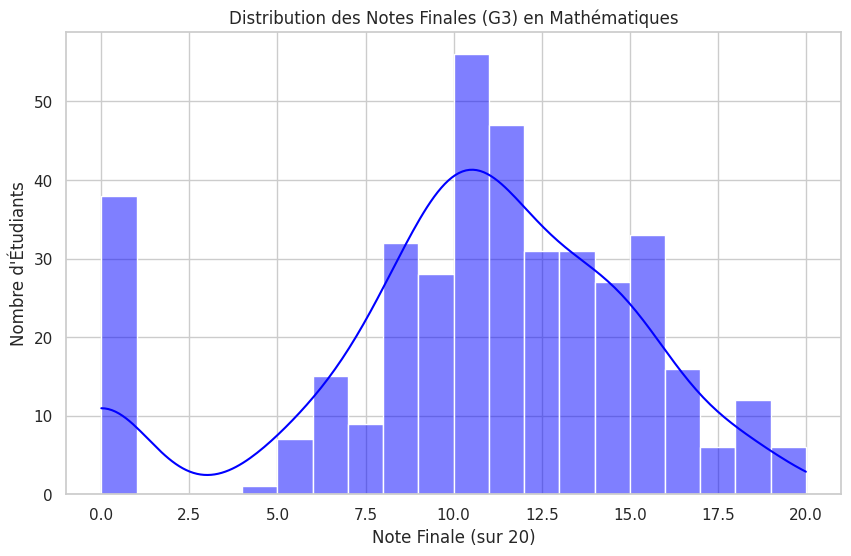

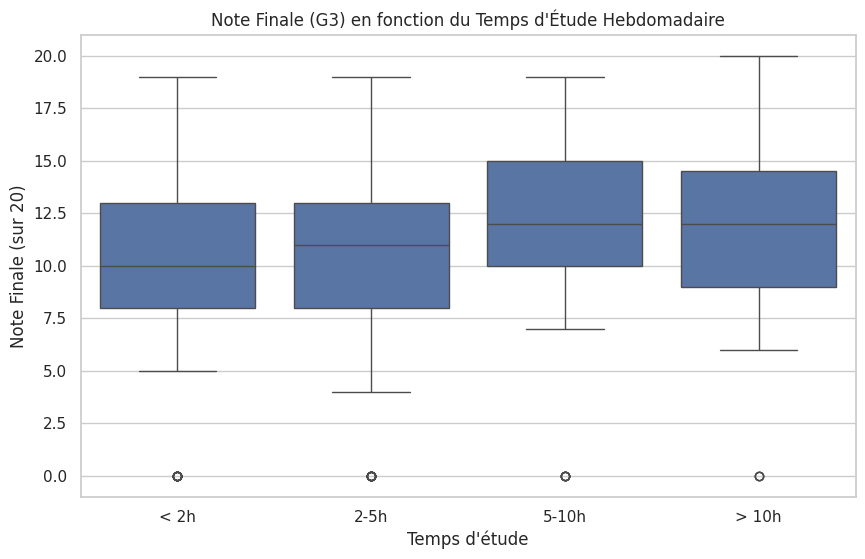

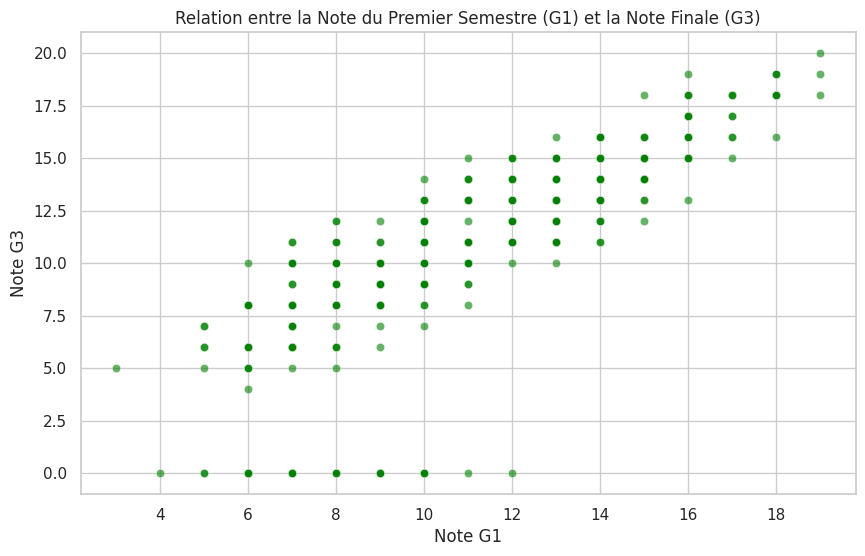

/tmp/ipython-input-264462986.py:160: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='failures', y='G3', data=df, palette='viridis')


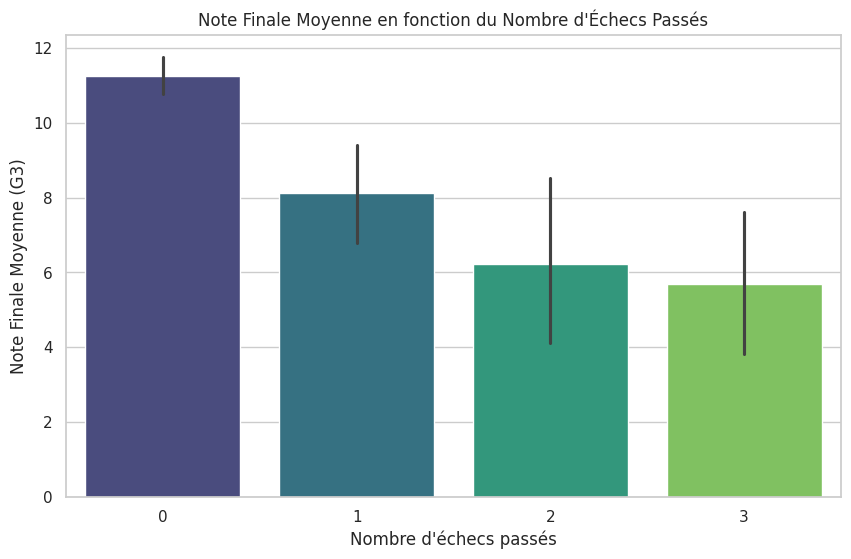

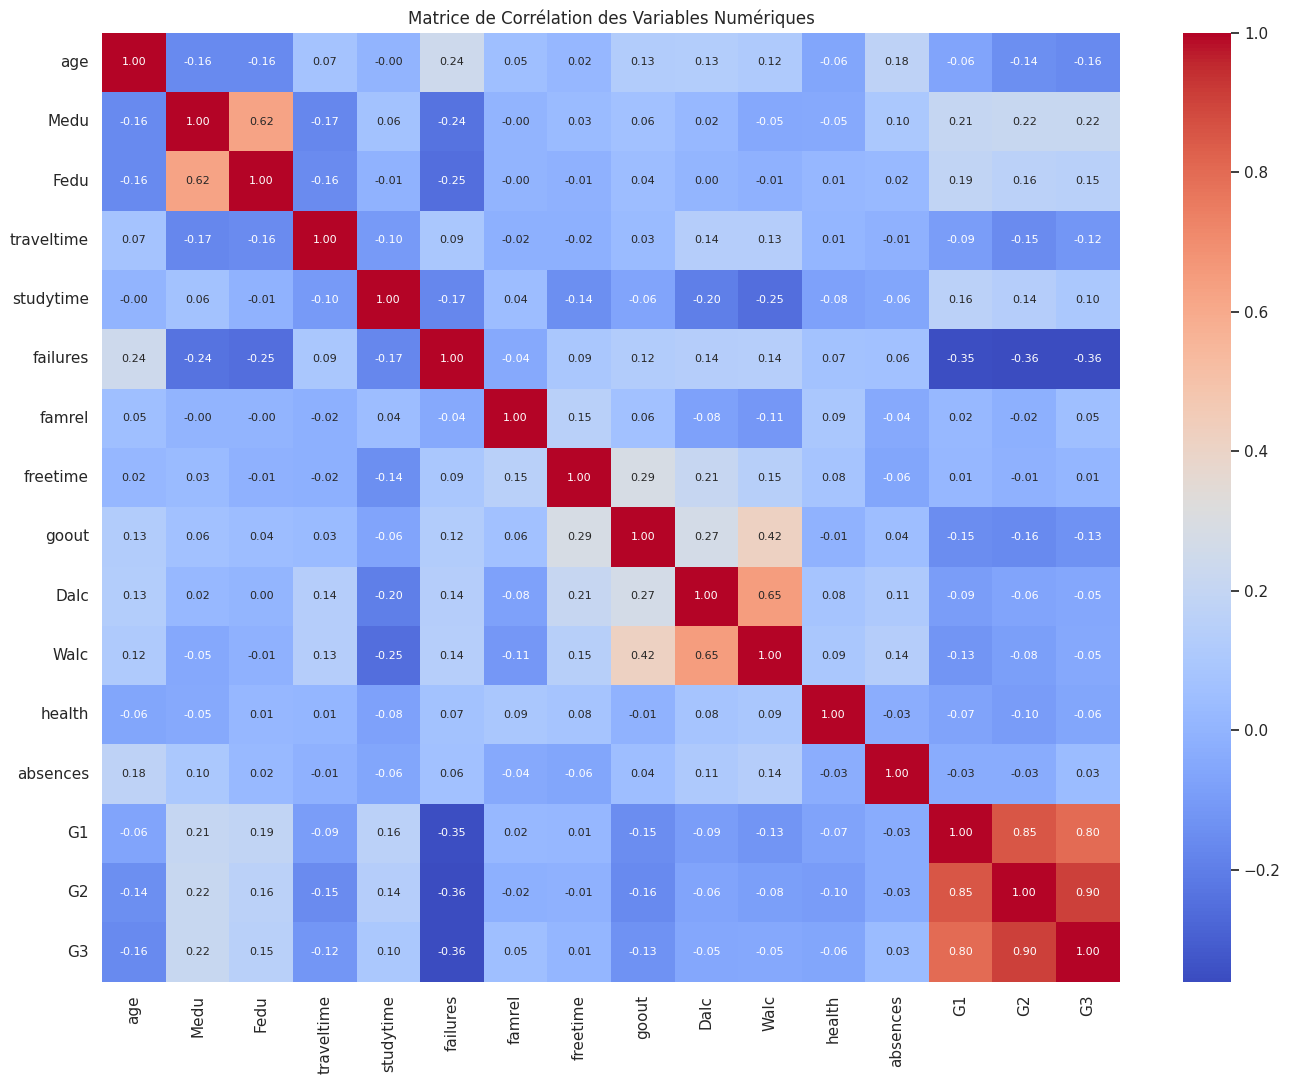


--- Analyse terminée ---


In [2]:
# ======================================================================
# === CODE PYTHON COMPLET POUR L'ANALYSE (GOOGLE COLAB) ===
# ======================================================================

# --- 1. IMPORTATION DES BIBLIOTHÈQUES ET CONFIGURATION ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurer Seaborn pour des graphiques plus esthétiques
sns.set(style="whitegrid")

# --- 2. TÉLÉCHARGEMENT ET CHARGEMENT DES DONNÉES ---

print("--- Téléchargement des données ---")
# Utilise wget pour télécharger le fichier (commande spécifique à Colab/Linux)
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip -q -O student.zip

# Dézippe le fichier (le -o écrase les fichiers existants sans demander)
!unzip -o student.zip

print("--- Chargement des données (student-mat.csv) ---")
# Charger le jeu de données (Mathématiques)
# IMPORTANT : Le séparateur de ce fichier est un point-virgule !
df = pd.read_csv('student-mat.csv', sep=';')


# --- 3. EXPLORATION INITIALE ---

print("\n--- 3.1. Aperçu des 5 premières lignes des données ---")
print(df.head())

print("\n--- 3.2. Informations générales sur le DataFrame (types, non-nuls) ---")
df.info()


# --- 4. ANALYSE STATISTIQUE DÉTAILLÉE (AVEC PRINT) ---

print("\n===============================================")
print("=== 4. ANALYSE STATISTIQUE DÉTAILLÉE ===")
print("===============================================")

# --- Analyse de la variable cible 'G3' (Note Finale) ---
print("\n--- Statistiques pour 'G3' (Note Finale) ---")

# Tendance centrale
mean_g3 = df['G3'].mean()
median_g3 = df['G3'].median()
mode_g3 = df['G3'].mode()[0]  # .mode() renvoie une série, [0] prend la première valeur

print(f"  Moyenne   : {mean_g3:.2f}")
print(f"  Médiane   : {median_g3}")
print(f"  Mode      : {mode_g3}")

# Dispersion et Position
std_g3 = df['G3'].std()
var_g3 = df['G3'].var()
min_g3 = df['G3'].min()
max_g3 = df['G3'].max()
range_g3 = max_g3 - min_g3
q1_g3 = df['G3'].quantile(0.25)
q3_g3 = df['G3'].quantile(0.75)
iqr_g3 = q3_g3 - q1_g3

print(f"\n  Écart-type: {std_g3:.2f}")
print(f"  Variance  : {var_g3:.2f}")
print(f"\n  Minimum   : {min_g3}")
print(f"  Maximum   : {max_g3}")
print(f"  Étendue (Range) : {range_g3}")
print(f"  Quartile 1 (Q1 - 25%) : {q1_g3}")
print(f"  Quartile 3 (Q3 - 75%) : {q3_g3}")
print(f"  Étendue Interquartile (IQR) : {iqr_g3}")

# Forme de la distribution
skew_g3 = df['G3'].skew()
kurt_g3 = df['G3'].kurt()

print(f"\n  Asymétrie (Skewness) : {skew_g3:.2f}")
print(f"  Aplatissement (Kurtosis) : {kurt_g3:.2f}")

# --- Analyse de la variable 'absences' ---
print("\n--- Statistiques pour 'absences' ---")

mean_abs = df['absences'].mean()
median_abs = df['absences'].median()
mode_abs = df['absences'].mode()[0]
std_abs = df['absences'].std()
max_abs = df['absences'].max()
q1_abs = df['absences'].quantile(0.25)
q3_abs = df['absences'].quantile(0.75)
skew_abs = df['absences'].skew()

print(f"  Moyenne   : {mean_abs:.2f}")
print(f"  Médiane   : {median_abs}")
print(f"  Mode      : {mode_abs}")
print(f"  Écart-type: {std_abs:.2f}")
print(f"  Maximum   : {max_abs}")
print(f"  Quartile 1 (Q1 - 25%): {q1_abs}")
print(f"  Quartile 3 (Q3 - 75%): {q3_abs}")
print(f"  Asymétrie (Skewness) : {skew_abs:.2f} (Note: très asymétrique)")


# --- Analyse de la variable 'age' ---
print("\n--- Statistiques pour 'age' ---")
print(f"  Moyenne   : {df['age'].mean():.2f}")
print(f"  Médiane   : {df['age'].median()}")
print(f"  Mode      : {df['age'].mode()[0]}")
print(f"  Minimum   : {df['age'].min()}")
print(f"  Maximum   : {df['age'].max()}")
print(f"  Quartile 1 (Q1 - 25%): {df['age'].quantile(0.25)}")
print(f"  Quartile 3 (Q3 - 75%): {df['age'].quantile(0.75)}")


# --- Résumé 'describe()' transposé (plus lisible) ---
print("\n===============================================")
print("=== RÉSUMÉ STATISTIQUE (pour toutes les var. numériques) ===")
print("===============================================")
# .T transpose le tableau (les colonnes deviennent des lignes)
print(df.describe().T)


# --- 5. VISUALISATIONS (GRAPHIQUES) ---

print("\n===============================================")
print("=== 5. GÉNÉRATION DES GRAPHIQUES... ===")
print("===============================================")

# A. Histogramme : Distribution des notes finales (G3)
plt.figure(figsize=(10, 6))
sns.histplot(df['G3'], bins=20, kde=True, color='blue')
plt.title('Distribution des Notes Finales (G3) en Mathématiques')
plt.xlabel('Note Finale (sur 20)')
plt.ylabel('Nombre d\'Étudiants')
plt.show()

# B. Boîte à Moustaches (Box Plot) : G3 vs Temps d'étude
# Mapper les chiffres en labels plus clairs pour le graphique
studytime_labels = {1: '< 2h', 2: '2-5h', 3: '5-10h', 4: '> 10h'}
df['studytime_label'] = df['studytime'].map(studytime_labels)

plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime_label', y='G3', data=df, order=['< 2h', '2-5h', '5-10h', '> 10h'])
plt.title('Note Finale (G3) en fonction du Temps d\'Étude Hebdomadaire')
plt.xlabel('Temps d\'étude')
plt.ylabel('Note Finale (sur 20)')
plt.show()

# C. Nuage de Points (Scatter Plot) : Corrélation G1 vs G3
plt.figure(figsize=(10, 6))
sns.scatterplot(x='G1', y='G3', data=df, alpha=0.6, color='green')
plt.title('Relation entre la Note du Premier Semestre (G1) et la Note Finale (G3)')
plt.xlabel('Note G1')
plt.ylabel('Note G3')
plt.show()

# D. Diagramme en Bâtons (Bar Plot) : G3 vs Échecs passés
plt.figure(figsize=(10, 6))
sns.barplot(x='failures', y='G3', data=df, palette='viridis')
plt.title('Note Finale Moyenne en fonction du Nombre d\'Échecs Passés')
plt.xlabel('Nombre d\'échecs passés')
plt.ylabel('Note Finale Moyenne (G3)')
plt.show()

# E. Matrice de Corrélation (Heatmap)
# Sélectionner uniquement les colonnes numériques pour la corrélation
numeric_cols = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 11))
sns.heatmap(numeric_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8})
plt.title('Matrice de Corrélation des Variables Numériques')
plt.tight_layout() # Ajuste le graphique pour éviter les superpositions
plt.show()

print("\n--- Analyse terminée ---")